<a href="https://colab.research.google.com/github/sajalsaini/ML-Projects/blob/main/TractorPartsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from fastbook import *

Defining categories of parts for which we are building a classfication algorithm.

In [3]:
part_types = "clutch disks", "mower blades", "bale spears", "alternator"
path = Path("parts")

In [4]:
part_types

('clutch disks', 'mower blades', 'bale spears', 'alternator')

In [5]:
type(part_types)

tuple

Writing a block of code to loop through all the part types mentioned above and download 200 images of each category. 

In [6]:
if not path.exists():
  path.mkdir()
  for o in part_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    urls = search_images_ddg(o, max_images = 200)
    download_images(dest, urls = urls)

In [7]:
fns = get_image_files(path)
fns

(#751) [Path('parts/mower blades/00000060.jpg'),Path('parts/mower blades/00000183.jpeg'),Path('parts/mower blades/00000096.jpg'),Path('parts/mower blades/00000082.jpg'),Path('parts/mower blades/00000170.jpg'),Path('parts/mower blades/00000189.jpeg'),Path('parts/mower blades/00000086.jpg'),Path('parts/mower blades/00000107.jpg'),Path('parts/mower blades/00000053.jpg'),Path('parts/mower blades/00000199.jpg')...]

In [8]:
parts = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [9]:
dls = parts.dataloaders(path)

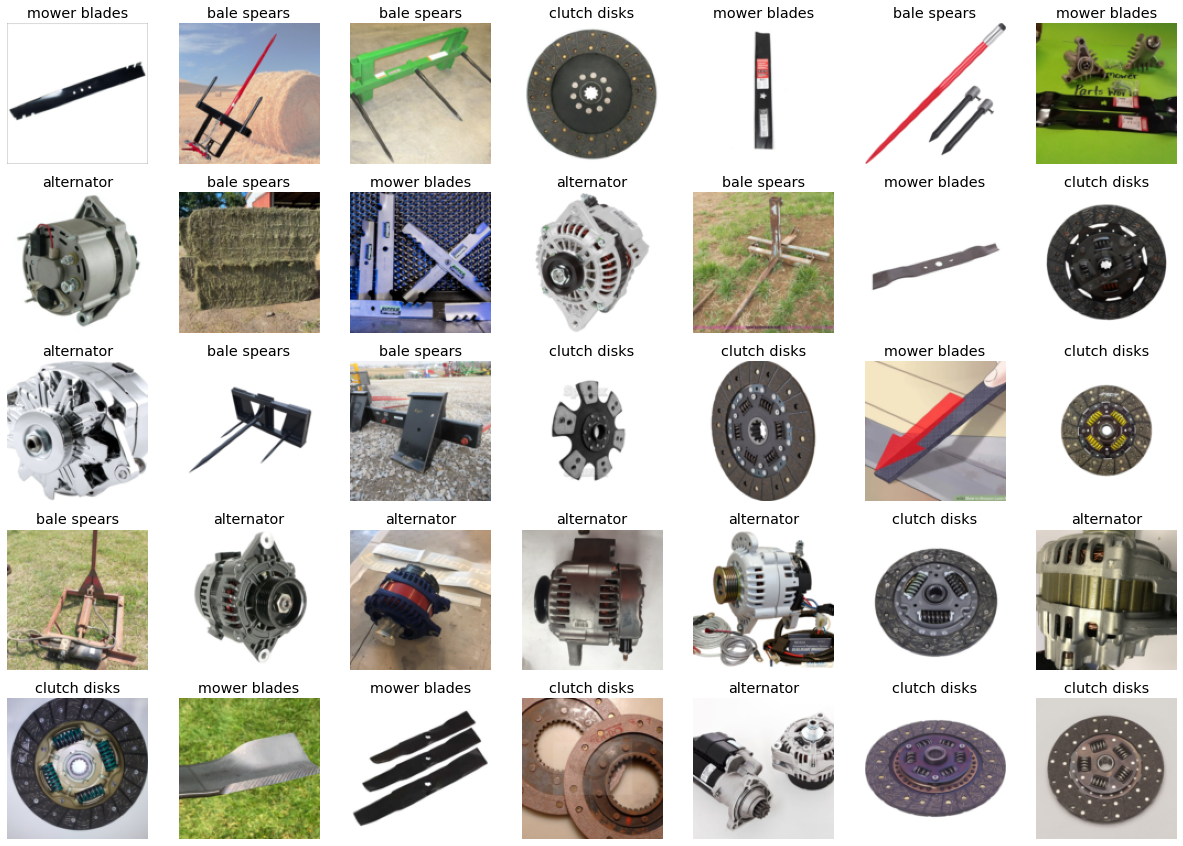

In [10]:
dls.valid.show_batch(max_n = 35, nrows = 5)

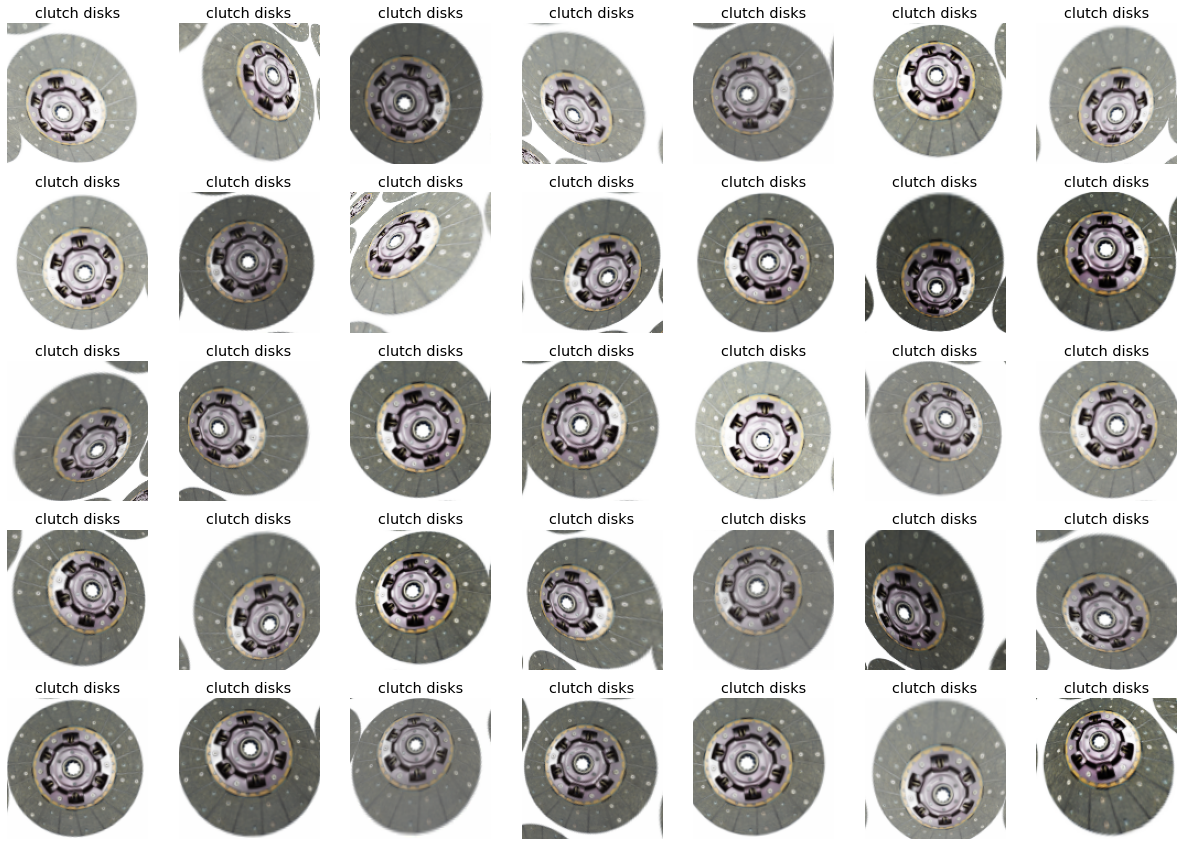

In [11]:
parts = parts.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = parts.dataloaders(path)
dls.train.show_batch(max_n = 35, nrows = 5, unique = True)

In [12]:
parts = parts.new(
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms()
)

dls = parts.dataloaders(path)

In [13]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,1.587999,0.319502,0.100000,02:15


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.297595,0.087815,0.033333,03:00
1,0.250387,0.050772,0.026667,02:58
2,0.201395,0.047263,0.020000,02:55
3,0.159702,0.050335,0.020000,02:55
4,0.128987,0.046753,0.020000,03:04


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


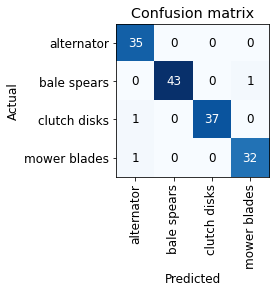

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

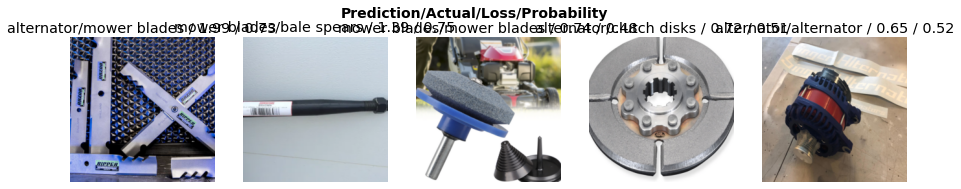

In [22]:
interp.plot_top_losses(5, nrows = 1)

In [21]:
help(plot_top_losses)

Help on TypeDispatch in module fastcore.dispatch:

(TensorImage,TensorMultiCategory) -> plot_top_lo...lot_top_losses
(object,object) -> plot_top_losses


In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts = ".pkl")

(#1) [Path('export.pkl')]

In [25]:
learn_inf = load_learner(path/"export.pkl")

In [26]:
learn_inf

In [40]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

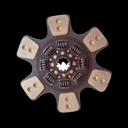

In [29]:
img = PILImage.create(uploader.data[0])
img.to_thumb(128,128)

In [38]:
btn_run = widgets.Button(description = "Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [36]:
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [42]:
def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [41]:
widgets.VBox([widgets.Label('Select your part!'), 
      uploader, btn_run, out_pl, lbl_pred])